In [9]:
import warnings
warnings.filterwarnings(action='ignore')
import requests
# from bs4 import BeautifulSoup
from datetime import datetime as dt

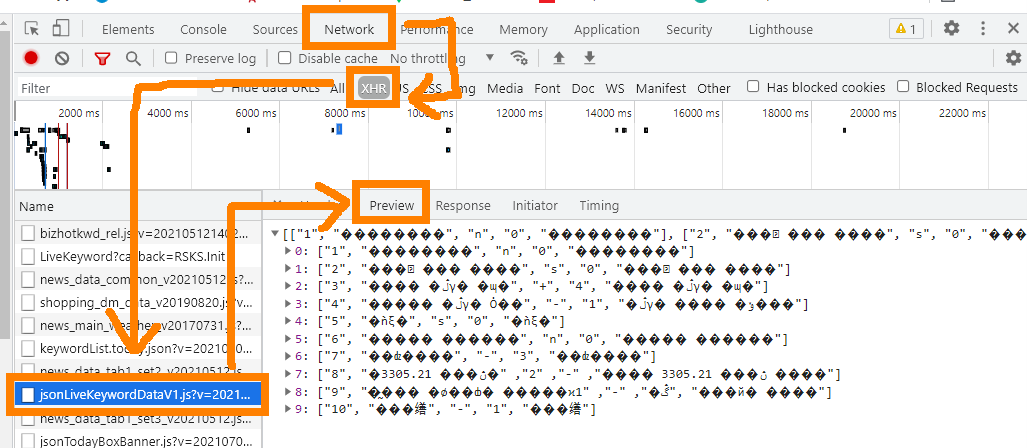

In [10]:
from IPython.display import Image
Image('./nateAjax.png', width='1100')

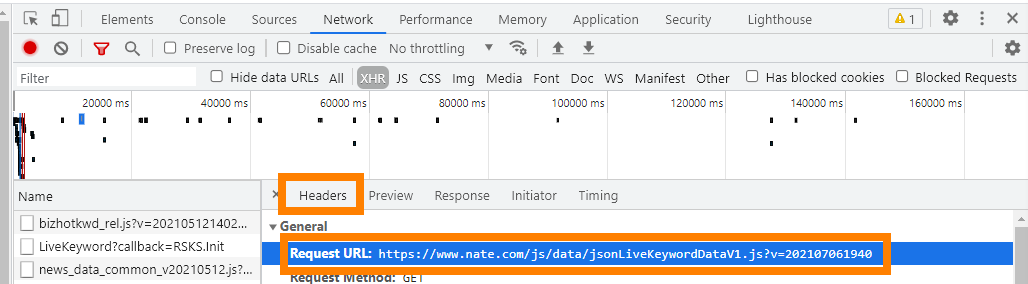

In [11]:
from IPython.display import Image
Image('./nateAjax2.png', width='1100')

In [12]:
# 실시간 검색어가 웹 페이지에 전부 혹은 일부가 포함되어있지 않고 ajax를 이용해서 받아오는 방식을 사용한다.
# Request Method가 GET이므로 requests 모듈의 get() 메소드를 사용해서 실시간 검색어를 얻어온다.
targetSite = 'https://www.nate.com/js/data/jsonLiveKeywordDataV1.js?v=2021070620155'
request = requests.get(targetSite)
print(request)

<Response [200]>


In [13]:
issues = request.text
print(type(issues)) # ajax로 처리되는 데이터는 무조건 문자열 형태로 얻어온다.
print(issues)

<class 'str'>
[["1",  "벨기에 대사 부인",  "+",  "1",  "벨기에 대사 부인"], ["2",  "생생정보",  "-",  "1",  "생생정보"], ["3",  "현대백화점 무역센터점",  "+",  "1",  "현대백화점 무역센터점"], ["4",  "생방송 투데이",  "+",  "2",  "생방송 투데이"], ["5",  "김민혁 코로나 확진",  "-",  "1",  "코로나 음성 격리로"], ["6",  "권민아",  "-",  "1",  "권민아"], ["7",  "신풍제약",  "s",  "0",  "신풍제약"], ["8",  "코스피 3305.21 마감",  "s",  "0",  "코스피 3305.21 마감"], ["9",  "박종진",  "n",  "0",  "박종진"], ["10",  "이강인 올림픽만 생각하겠다",  "-",  "1",  "김학범 감독"]]


In [14]:
# request 모듈의 jaon() 메소드로 서버에 요청해서 전달받은 데이터를 파이썬에서 처리할 수 있는 리스트나 딕셔너리 타입으로 
# 변환한다. => 데이터가 []로 묶여있으면 리스트로 {}로 묶여있으면 딕셔너리로 자동 변환한다.
ranks = request.json()
print(type(ranks))
print(ranks)

<class 'list'>
[['1', '벨기에 대사 부인', '+', '1', '벨기에 대사 부인'], ['2', '생생정보', '-', '1', '생생정보'], ['3', '현대백화점 무역센터점', '+', '1', '현대백화점 무역센터점'], ['4', '생방송 투데이', '+', '2', '생방송 투데이'], ['5', '김민혁 코로나 확진', '-', '1', '코로나 음성 격리로'], ['6', '권민아', '-', '1', '권민아'], ['7', '신풍제약', 's', '0', '신풍제약'], ['8', '코스피 3305.21 마감', 's', '0', '코스피 3305.21 마감'], ['9', '박종진', 'n', '0', '박종진'], ['10', '이강인 올림픽만 생각하겠다', '-', '1', '김학범 감독']]


In [15]:
import json
# json 문자열 형태로 얻어온 데이터를 json 모듈의 loads() 메소드를 사용해서 파이썬에서 처리할 수 있는 리스트나 딕셔너리 타입으로
# 변환한다. => 데이터가 []로 묶여있으면 리스트로 {}로 묶여있으면 딕셔너리로 자동 변환한다.
ranks = json.loads(issues)
print(type(ranks))
print(ranks)

<class 'list'>
[['1', '벨기에 대사 부인', '+', '1', '벨기에 대사 부인'], ['2', '생생정보', '-', '1', '생생정보'], ['3', '현대백화점 무역센터점', '+', '1', '현대백화점 무역센터점'], ['4', '생방송 투데이', '+', '2', '생방송 투데이'], ['5', '김민혁 코로나 확진', '-', '1', '코로나 음성 격리로'], ['6', '권민아', '-', '1', '권민아'], ['7', '신풍제약', 's', '0', '신풍제약'], ['8', '코스피 3305.21 마감', 's', '0', '코스피 3305.21 마감'], ['9', '박종진', 'n', '0', '박종진'], ['10', '이강인 올림픽만 생각하겠다', '-', '1', '김학범 감독']]


In [16]:
for rank in ranks:
    print(rank[0], rank[1], end=' ')
    if rank[2] == '+':
        print('↑' + rank[3])
    elif rank[2] == '-':
        print('↓' + rank[3])
    elif rank[2] == 's':
        print('-')
    else:
        print('new')

1 벨기에 대사 부인 ↑1
2 생생정보 ↓1
3 현대백화점 무역센터점 ↑1
4 생방송 투데이 ↑2
5 김민혁 코로나 확진 ↓1
6 권민아 ↓1
7 신풍제약 -
8 코스피 3305.21 마감 -
9 박종진 new
10 이강인 올림픽만 생각하겠다 ↓1
